### Kecerdasan Buatan
<h3> Nama : Yusdiansya Putra </h3>
<h3> NIM  : 09011381823078 </h3>
<h3> Kelas: SK5A </h3>
<h3>Sumber: https://github.com/enesgirgin/ECG-Analysis-with-Artifical-Neural-Network</h3>

<center><h2> Deteksi Infark Miokard dengan Artificial Neural Network </h2></center>
<h3>Penjelasan</h3>
<p>Elektrokardiogram (EKG) adalah alat penting dalam mendiagnosis penyakit kardiovaskular. myocardial infarction (MI) adalah salah satu penyakit kardiovaskular paling umum pada manusia. Diagnosis yang benar sangat penting dalam MI. EKG adalah alat penting untuk menganalisis fungsi sistem kardiovaskular. EKG mencatat aktivitas listrik jantung. Detak jantung normal dan abnormal diproses sebagai sinyal listrik dan ditransfer ke grafik visual. Namun, cukup sulit untuk menafsirkan sinyal EKG secara visual. Dalam makalah ini, kami mengusulkan pendekatan yang secara otomatis dapat mendeteksi MI. Kami menggunakan algoritma jaringan saraf tiruan untuk mendeteksi detak jantung normal dan abnormal. Kami menggunakan dataset PTB Diagnostics dalam proyek ini. Kami mengklasifikasikan data dalam dua keluaran, yaitu MI (abnormal) dan kontrol sehat (normal). Kami mencapai akurasi 91,2% dalam klasifikasi.</p>

<h2>Mengimport Library yang dibutuhkan</h2>
<h3>Penjelasan</h3>
<p>1. Pandas as pd atau singkkatan dari python data analysis library merupakan sebuah open source python package/library dengan lisensi BSD yang menyediakan banyak perkakas untuk kebutuhan data analisis, manipulasi dan pembersihan data. Pandas mendukung pembacaan dan penulisan data dengan media berupa excel spreadsheet, CSV, dan SQL yang kemudian akan dijadikan sebagai objek python dengan rows dan columns yang disebut data frame seperti halnya pada tabel statistik.</p> 
<p>2. NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python. Keunggulan NumPy array dibandingkan dengan list pada Python adalah konsumsi memory yang lebih kecil serta runtime yang lebih cepat. NumPy juga memudahkan kita pada Aljabar Linear, terutama operasi pada Vector (1-d array) dan Matrix (2-d array)</p>
<p>3. Matplotlib adalah librari plotting 2D Python yang menghasilkan gambar publikasi bermutu di dalam berbagai format hardcopy dan lingkungan interaktif sepanjang platform.</p>
<p>4. from sklearn.model_selection import train_test_split adalah memisahkan array atau matriks menjadi rangkaian acak dan subset pengujian Utilitas cepat yang membungkus validasi input dan berikutnya (ShuffleSplit (). Split (X, y)) dan aplikasi untuk memasukkan data ke dalam satu panggilan untuk memisahkan (dan secara opsional subsampling) data dalam satu jalur.</p>


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

<h2> Mengimport Dataset </h2>

In [23]:
normal = pd.read_csv('C:/Users/asus/Desktop/SK5A/KECERDASAN BUATAN SK5A/ptbdb_normal.csv')
abnormal = pd.read_csv('C:/Users/asus/Desktop/SK5A/KECERDASAN BUATAN SK5A/ptbdb_abnormal.csv')

## Menampilkan Isi dari Dataset

In [24]:
new_column_name = []
for num in range(abnormal.shape[1]-1):
    tem = 'time' + str(num)
    new_column_name.append(tem)
new_column_name.append("Label")    #label = 1 for abnormal
abnormal.columns = new_column_name    


column_name = []
for num in range(normal.shape[1]-1):
    tem = 'time' + str(num)
    column_name.append(tem)
column_name.append("Label")    #label = 0 for normal
normal.columns = column_name

abnormal.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Pandas Concat()
<p>digunakan untuk menggabungkan objek pandas seperti DataFrames dan Series.</p>

In [25]:
data=[normal,abnormal]
data=pd.concat(data)

In [26]:
data["Label"].value_counts()   #we have 10505 abnormal(1) beat and 4045 normal(0) beat.

1.0    10505
0.0     4045
Name: Label, dtype: int64

### Plot nilai dataset
<p>Kami juga dapat memplot kerangka data Pandas. Ini secara implisit menggunakan matplotlib.pyplot.</p>
<p>Pengindeks iloc untuk Pandas Dataframe digunakan untuk pengindeksan / pemilihan berbasis lokasi integer berdasarkan posisi. Sintaks pengindeks iloc adalah data.iloc [<pemilihan baris>, <pemilihan kolom>], yang pasti akan menjadi sumber kebingungan bagi pengguna R. "Iloc" di pandas digunakan untuk memilih baris dan kolom berdasarkan nomor, sesuai urutan kemunculannya dalam bingkai data. Anda dapat membayangkan bahwa setiap baris memiliki nomor baris dari 0 hingga total baris (data.shape [0]) dan iloc [] memungkinkan pemilihan berdasarkan nomor-nomor ini. Hal yang sama berlaku untuk kolom (mulai dari 0 hingga data.shape [1])</p>

0.0


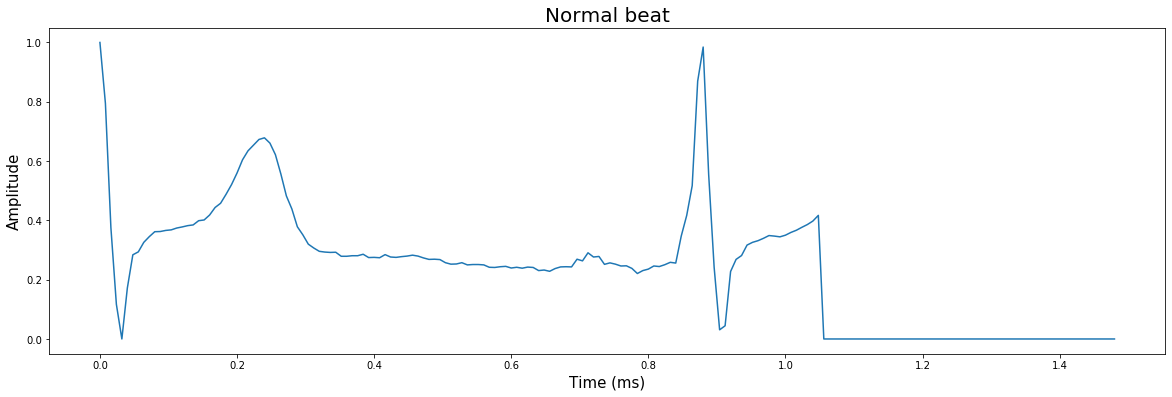

In [27]:
x = np.arange(0, 186)*8/1000    #to second

print(data.iloc[0,187]) #normal sample
plt.figure(figsize=(20,6))
plt.title("Normal beat", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.plot(x,data.iloc[0,:186]) 

#normal beat sample


1.0


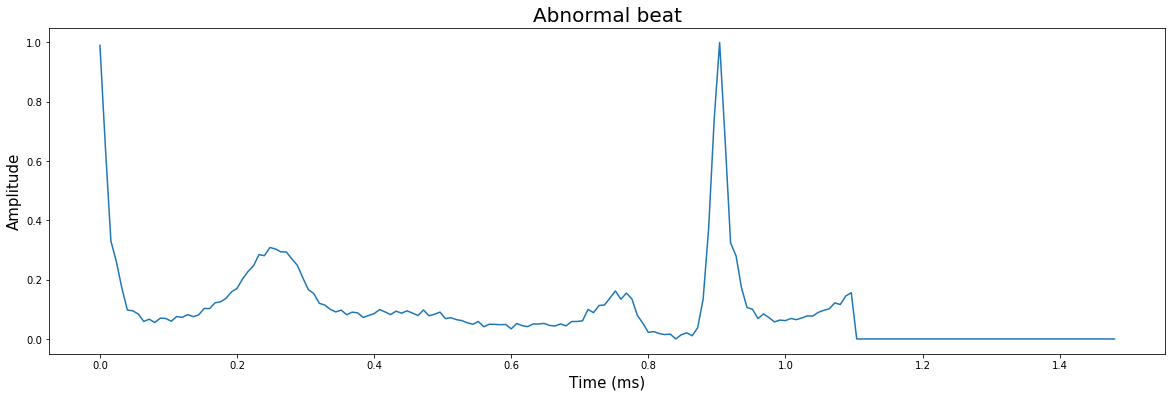

In [28]:
x = np.arange(0, 186)*8/1000   #to second

print(data.iloc[10000,187]) #abnormal sample
plt.figure(figsize=(20,6))
plt.title("Abnormal beat", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.plot(x,data.iloc[10000,:186]) 

#abnormal sample

### Grouping dan Sorting
<p>Pada bagian grouping, Pandas juga memfasilitasi grouping data kita dapat melakukan pengelompokan data berdasarkan nama tertentu dan menghitung statistiknya.Sedangkan sorting, Pandas dapat melakukan sorting data dengan memanfaatkan function .sort_values().</p>

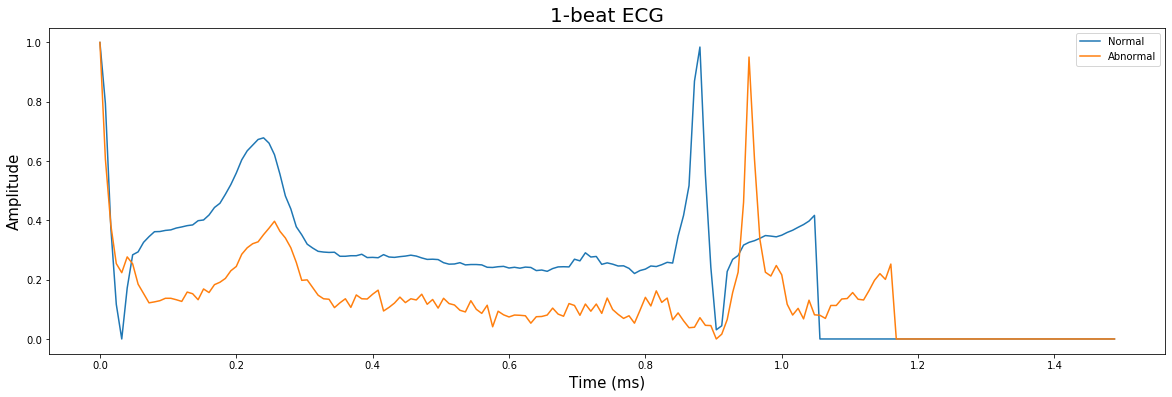

In [29]:
M = data.values
X = M[:, :-1]                    #all features
y = M[:, -1].astype(int)         #label
x = np.arange(0, 187)*8/1000     #to second

#grouping and sorting
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()

plt.figure(figsize=(20,6))
plt.plot(x, X[C0, :][0], label="Normal")    #one sample normal
plt.plot(x, X[C1, :][0], label="Abnormal")  #one sample abnormal
plt.legend()
plt.title("1-beat ECG", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [30]:
from sklearn.utils import shuffle
data=shuffle(data)                 #shuffle the data to for training
data.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
8002,0.936236,0.825298,0.489373,0.423017,0.327631,0.342146,0.314152,0.332815,0.322965,0.327112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3982,0.970548,0.536585,0.223194,0.082835,0.000000,0.028992,0.058445,0.053843,0.055683,0.061666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7202,0.965948,0.828491,0.646673,0.434864,0.318963,0.169634,0.081537,0.079038,0.064667,0.077163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1977,0.983407,0.885926,0.468444,0.304000,0.202963,0.187259,0.146074,0.128296,0.116444,0.112296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2685,0.969914,0.919054,0.803009,0.660458,0.395415,0.143266,0.074499,0.000000,0.148997,0.210602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Membagi menjadi training set dan test set
<p> -Training set adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma ML. Kita memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri atau belajar pola dari data yang diberikan.</P>
<p> -Test set adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.</P>
<p> -Proses import train_test_split. Library train_test_split ini adalah sublibrary dari modul model_selection di library sklearn, sehingga penulisan untuk mengimportnya seperti itu (from.. import..)</p>
<p> -Proses pendefinisian X_train sebagai data X yang ingin kita latih (train), X_test sebagai data X yang ingin kita tes, y_train adalah variabel dependen yang dilatih, dan y_test merupakan variabel dependen yang diuji. Kita mendefinisikan keempat variabel ini secara bersamaan. Pada perintah train_test_split diisi dengan parameter arrays X,y yang menunjukkan arrays yang dipakai adalah X sebagai variabel independen dan y sebagai variabel dependen. Parameter selanjutnya adalah test_size sebesar 20%. Biasanya sebagai rule of thumb (aturan umum) proporsi test set sebesar 20% dan train set 80%. Namun ada juga yang menentukan 25:75, terserah Anda ingin yang mana. Parameter lainnya adalah random_state yang merupakan random number generator (RNG).</p>

In [31]:
y = data["Label"].values   #our labels

data.drop(["Label"],axis=1,inplace=True)  

x = data  #features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


In [32]:
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 0))
print(np.count_nonzero(y_test == 1))
print(np.count_nonzero(y_test == 0))

8395
3245
2110
800


In [33]:
x_train = x_train.values.T
x_test = x_test.values.T

y_train = y_train.reshape(-1,1).T
y_test = y_test.reshape(-1,1).T

## Inisialisasi Parameter
<p>Model Parameter Initialization adalah inisialisasi nilai awal parameter untuk model, yaitu weights dan biases.Inisialisasi nilai parameter sangat penting, karena inisialisasi yang asal akan menghasilkan model yang tidak optimal.Pada lesson sebelumnya, cara inisialisasi yang dilakukan hanya dengan menentukan nilai random dalam rentang -0.1 s/d 0.1 menggunakan numpy.random.uniform function. Setiap nilai dalam rentang diatas memiliki probabilitas yang sama untuk dipilih.Pendekatan kedua adalah menggunakan normal initializer, dengan memilih nilai random yang kecil dalam rentang -0.1 s/d 0.1 dalam zero mean normal distribution.Karena distribusi normal, nilai yang terpilih kemungkinan besar dekat dengan nilai 0.Kedua pendekatan diatas dapat menimbulkan masalah dalam deep learning yang menggunakan activation function. Seperti yang kita ketahui, activation function bertujuan menambahkan non-linearity pada model yang kita training.Activation function dalam hal ini kita gunakan sigmoid activation function, akan menerima input dari hasil perhitungan linear dari layer sebelumnya.Jika nilai weights terlalu rendah, maka nilai akan jatuh ditengah-tengah. Pada area ini, sigmoid hampir linear. Begitu juga jika terlalu besar, nilai akan jatuh diarea atas, dimana sigmoid hampir linear juga. Jadi tujuan kita menambahkan non-linearity pada model tidak tercapai. (menambahkan non-linearity merupakan salah satu tujuan dari deep-net).</p>

#### ANN adalah sekumpulan neuran yang terorganisir dalam lapisan-lapisan
<p>-input layer : lapisan yang membawa data masuk kedalam system untuk kemudian di proses pada layer selanjutnya.</p>
<p>-hidden layer: lapisan antara input layer dan output layer, dimana artificial neuron yang memiliki sekumpulan input pembobot ‘weight’ dan prosedur untuk menghasilkan output neuron melalui activation function.</p>
<p>-output layer: lapisan terakhir dari neuron yang menghasilkan output system.</p>

In [34]:
def initialize_param(layers_with_nodes,in_data,out_data):
    
    #input layer's values.
    
    layer_amount = len(layers_with_nodes)
    
    parameters = {}
    parameters["weight1"] = np.random.randn(layers_with_nodes[0],in_data.shape[0]) * 0.1
    parameters["bias1"] = np.zeros((layers_with_nodes[0],1))
    
    print("" + str(layer_amount+2) + " layers. (" + str(layer_amount) + " hidden layer)")

    #the hidden layer's values.
    
    for i in range(layer_amount-1):
        #print(i+2)
        w = "weight" + str(i+2)
        b = "bias" + str(i+2)
        parameters[w] = np.random.randn(layers_with_nodes[i+1],layers_with_nodes[i]) * 0.1
        parameters[b] = np.zeros((layers_with_nodes[i+1],1))
    
    #output layer's values.
    
    lastw = "weight" + str(layer_amount+1)
    lastb = "bias" + str(layer_amount+1)
    parameters[lastw] = np.random.randn(out_data.shape[0],layers_with_nodes[layer_amount-1]) * 0.1
    parameters[lastb] = np.zeros((out_data.shape[0],1))
    
    return parameters, (layer_amount+1)

### Sigmoid
<p>Kasus khusus dari fungsi sigmoid termasuk kurva Gompertz (digunakan dalam sistem pemodelan yang memenuhi nilai x yang besar) dan kurva ogee (digunakan pada spillway beberapa bendungan ). Fungsi sigmoid memiliki domain semua bilangan real , dengan nilai balik (respon) yang umumnya meningkat secara monoton tetapi bisa juga menurun. Fungsi sigmoid paling sering menunjukkan nilai kembali (sumbu y) dalam rentang 0 hingga 1. Rentang lain yang umum digunakan adalah dari −1 hingga 1.
Berbagai macam fungsi sigmoid termasuk logistik dan tangen hiperbolik fungsi telah digunakan sebagai fungsi aktivasi dari neuron buatan . Kurva sigmoid juga umum dalam statistik sebagai fungsi distribusi kumulatif (yang berubah dari 0 ke 1), seperti integral dari kepadatan logistik , kepadatan normal , dan fungsi kepadatan probabilitas t Student . Fungsi sigmoid logistik dapat dibalik, dan kebalikannya adalah fungsi logit.</p>

<p>Fungsi Sigmoid yang dirumuskan sebagai berikut:</p>

<p>O_j(X,W) = 1 / (1 + exp(A_j(X,W)))</p>

<p>dimana:</p>
<p>O_j(X,W) : output ke j</p>

### Loss Function
<p>Semakin rendah loss, semakin baik modelnya (kecuali jika model tersebut terlalu pas dengan data pelatihan). Loss dihitung pada pelatihan dan validasi dan interperasinya adalah seberapa baik kinerja model untuk dua set ini. Tidak seperti akurasi, kerugian bukanlah persentase. Ini adalah penjumlahan dari kesalahan yang dibuat untuk setiap contoh dalam set pelatihan atau validasi. Dalam kasus jaringan saraf, kerugian biasanya berupa kemungkinan log negatif dan jumlah sisa kuadrat untuk masing-masing klasifikasi dan regresi. Maka secara alami, tujuan utama dalam model pembelajaran adalah untuk mengurangi (meminimalkan) nilai fungsi kerugian sehubungan dengan parameter model dengan mengubah nilai vektor bobot melalui metode pengoptimalan yang berbeda, seperti propagasi mundur di jaringan saraf. Nilai Loss menyiratkan seberapa baik atau buruk model tertentu berperilaku setelah setiap iterasi pengoptimalan. Idealnya, seseorang akan mengharapkan pengurangan kerugian setelah setiap, atau beberapa, iterasi.</p>

In [35]:
def sigmoid(x):
    y_head = 1/(1 + np.exp(-x))   # basic sigmoid for output layer
    return y_head;

def compute_cost(A_f, y_train):
    logprobs = np.multiply(np.log(A_f),y_train)
    cost = -np.sum(logprobs)/y_train.shape[1]    # computing the loss value
    return cost

## Forward Propagation
Forward Propagation adalah operasi yang akan dilakukan pada setiap elemen pada input dan tiap weight yang terhubung dengan input dan ditambahkan dengan bias. Hasil dari operasi ini akan dimasukkan ke dalam activation function.
<p>Forward propagation merupakan sebuah perhitungan maju dari input menuju output. Contoh.</p>

<p>N1=(x1*w1+x2*w2…….xn*wn)-b</p>

<p>Out=(N1*w10+N2*w11…..Nn*wn)-b</p>

<p>N = Neuron</p>

<p>x = input</p>

<p>w = weight</p>

<p>Out = output</p>

<p>b = bias</p>

### Weight dan Bias
<p>Weight adalah parameter dalam jaringan neural yang mengubah data masukan dalam lapisan tersembunyi jaringan. Jaringan saraf adalah serangkaian node, atau neuron. Dalam setiap node adalah satu set input, bobot, dan nilai bias. Saat input memasuki node, itu akan dikalikan dengan nilai bobot dan output yang dihasilkan diamati, atau diteruskan ke lapisan berikutnya di jaringan saraf. Seringkali bobot jaringan neural terkandung dalam lapisan jaringan yang tersembunyi.</p>
<p>Bias hanyalah nilai konstan (atau vektor konstan) yang ditambahkan ke produk input dan bobot. Bias digunakan untuk mengimbangi hasil. Bias digunakan untuk menggeser hasil fungsi aktivasi ke arah positif atau negatif.

<p>Adapun rumus yang digunakan untuk menghitung weighted sum adalah:</p>

<p>A_j(X,W) = SUM(i=1 to n) x_i * w_ji</p>

<p>dimana:</p>
<p>j : indeks dari output</p>
<p>i : indeks dari input</p>
<p>x_i : input ke i</p>
<p>w_ji : weight dari input ke i ke output ke j</p>

![GambarWAB/WeightdanBias.jpg](GambarWAB/WeightdanBias.jpg)

In [36]:
def forw_prop_NN(in_data, parameters, connection_amount): # forward propagation
    
    cache = {}
    a0 = in_data
    
    
    for i in range(connection_amount-1):
        w = "weight" + str(i+1)   
        b = "bias" + str(i+1) 
        
        z = "Z" + str(i+1)
        a = "A" + str(i+1)
        
        cache[z] = np.dot(parameters[w],a0) + parameters[b]
        cache[a] = np.tanh(cache[z])
        a0 = cache[a]
        
        
    # output layer
    
    z_fin = "Z" + str(connection_amount)
    a_fin = "A" + str(connection_amount)
    
    w = "weight" + str(connection_amount)   
    b = "bias" + str(connection_amount)
    
    a0 = "A" + str(connection_amount-1)
    
    cache[z_fin] = np.dot(parameters[w],cache[a0]) + parameters[b]
    cache[a_fin] = sigmoid(cache[z_fin])
    A = cache[a_fin]
 
    return A, cache

## Backpropagation
<p>Backpropagation adalah algoritma pembelajaran untuk memperkecil tingkat error dengan cara menyesuaikan bobotnya berdasarkan perbedaan output dan target yang diinginkan. Backpropagation juga merupakan sebuah metode sistematik untuk pelatihan multilayer JST. Backpopagation dikatakan sebagai algoritma pelatihan multilayer karena Backpropagation memiliki tiga layer dalam proses pelatihannya, yaitu input layer, hidden layer dan output layer, dimana backpropagation ini merupakan perkembangan dari single layer network (Jaringan Layar Tunggal) yang memiliki dua layer, yaitu input layer dan output layer. Dengan adanya hidden layer pada backpropagation dapat menyebabkan besarnya tingkat error pada backpropagation lebih kecil dibanding tingkat error pada single layer network. Hal tersebut dikarenakan hidden layer pada backpropagation berfungsi sebagai tempat untuk mengupdate dan menyesuaikan bobot, sehingga didapatkan nilai bobot yang baru yang bisa diarahkan mendekati dengan target output yang diinginkan.</p>
<p>Hasil dari forward propagation adalah sebuah output. Namun apakah output yang dihasilkan network sudah sesuai dengan target yang diinginkan? Maka dihitunglah error.</p>

<p>Error = target – output</p>

<p>Atau bisa juga</p>

<p>Error = 1/2*(target – output)^2</p>

<p>Setelah mendapatkan nilai error, langkah berikutnya adalah mencari nilai differensial (dy/dx) untuk semua komponen dalam jaringan. Nilai differensial ini akan memperbarui nilai lama yang bertujuan untuk meminimalisir error. Sehingga diperoleh error = 0.</p>

<p>Jika error = 0, maka sistem ANN sudah siap untuk digunakan.</p>

## Arsitektur Backpropagation
<p>Arsitektur algoritma backpropagation terdiri dari tiga layer, yaitu input layer, hidden layer dan output layer. Pada input layer tidak terjadi proses komputasi, namun pada input layer terjadi pengiriman sinyal input X ke hidden layer. Pada hidden dan output layer terjadi proses komputasi terhadap bobot dan bias dan dihitung pula besarnya output dari hidden dan output layer tersebut berdasarkan fungsi aktivasi tertentu. Dalam algoritma backpropagation ini digunakan fungsi aktivasi sigmoid biner, karena output yang diharapkan bernilai antara 0 sampai 1. Tiga layer backpropagation adalah input layer, hidden layer dan output layer. Pada input layer, inputan divariabelkan dengan Xn. Pada hidden layer, terdapat bobot (Vij) dan bias (Voj), serta Z sebagai data hidden layer. Pada output layer juga demikian, terdapat bobot (Wij) dan bias (Woj) dengan data output divariabelkan dengan Y.</p>

<p>Secara umum algoritmanya terdiri dari tiga langkah utama, yaitu :</p>
<p>-Pengambilan input</p>
<p>-Penelusuran error</p>
<p>-Penyesuaian bobot</p>

<p>Mengapa saya menggunakan metode backpropagation? karena dengan adanya hidden layer pada metode backpropagation dapat menyebabkan besarnya tingkat error pada backpropagation lebih kecil dibanding tingkat error pada single layer network. Hal tersebut dikarenakan hidden layer pada backpropagation berfungsi sebagai tempat untuk mengupdate dan menyesuaikan bobot, sehingga didapatkan nilai bobot yang baru yang bisa diarahkan mendekati dengan target output yang diinginkan.</p>

In [37]:
def backw_prop_NN(parameters,cache,x_train,y_train,connection_amount):  #backpropagation
    
    dz = {}
    grads = {}
    
    
    # firstly start with output layer.
    
    a_fin = "A" + str(connection_amount)
    a_pre_fin = "A" + str(connection_amount-1)
    w_fin = "dweight" + str(connection_amount)
    b_fin = "dbias" + str(connection_amount)
    
    dz[connection_amount] = cache[a_fin] - y_train
    grads[w_fin] = np.dot(dz[connection_amount],cache[a_pre_fin].T)/x_train.shape[1]
    grads[b_fin] = np.sum(dz[connection_amount], axis=1, keepdims=True)/x_train.shape[1]
    
    # other layers.
    
    for i in range((connection_amount-1),1,-1):
        a = "A" + str(i)
        a_pre = "A" + str(i-1)
        dw = "dweight" + str(i)
        db = "dbias" + str(i)
        w = "weight" + str(i+1)
        
        dz[i] = np.dot(parameters[w].T,dz[i+1])*(1 - np.power(cache[a], 2))
        grads[dw] = np.dot(dz[i],cache[a_pre].T)/x_train.shape[1]
        grads[db] = np.sum(dz[i], axis=1,keepdims=True)/x_train.shape[1]
    
    dz[1] = np.dot(parameters["weight2"].T,dz[2])*(1 - np.power(cache["A1"], 2))
    grads["dweight1"] = np.dot(dz[1],x_train.T)/x_train.shape[1]
    grads["dbias1"] = np.sum(dz[1],axis =1,keepdims=True)/x_train.shape[1]
    
    return grads

### Parameter
<p>Parameter adalah koefisien model, dan mereka dipilih oleh model itu sendiri. Ini berarti bahwa algoritme, saat belajar, mengoptimalkan koefisien ini (sesuai dengan strategi pengoptimalan yang diberikan) dan mengembalikan serangkaian parameter yang meminimalkan kesalahan. Sebagai contoh, dalam tugas regresi linier, Anda memiliki model yang akan terlihat seperti y = b + ax, di mana b dan a akan menjadi parameter Anda. Satu-satunya hal yang harus Anda lakukan dengan parameter tersebut adalah menginisialisasinya (kita akan lihat nanti apa artinya).</p>

In [38]:
def update_param(parameters, grads, connection_amount, lr=0.01): #update
    for i in range(connection_amount):
        w = "weight" + str(i+1)
        b = "bias" + str(i+1)
        dw = "dweight" + str(i+1)
        db = "dbias" + str(i+1)
        
        parameters[w] = parameters[w] - lr*grads[dw]
        parameters[b] = parameters[b] - lr*grads[db]
        
    return parameters                

### Accuracy Prediction
<p>Accuracy Prediction dari nilai masa depan data deret waktu sangat penting untuk pengambilan keputusan strategis seperti manajemen inventaris, perencanaan anggaran, manajemen hubungan pelanggan, promosi pemasaran, dan alokasi sumber daya yang efisien.</p>

In [39]:
def predict(A,parameters,x_test,connection_amount): #prediction
    
    A, cache = forw_prop_NN(x_test,parameters,connection_amount)
    Y_prediction = np.zeros((1,x_test.shape[1]))
 
    for i in range(A.shape[1]):
        if A[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction             # basic binary prediction.

### Multi Layer
<p>Pada single layer apabila terdapat tambahan satu atau dua hidden layer maka jaringan akan terganggu karena input dan output dari jaringan tidak dapat melihat hidden layer yang di masukkan. Sehingga memerlukan jaringan yang bisa menampung nya yaitu bernama multi layer. Cara kerja  multi layer adalah input layer menyuplai input vektor pada jaringan, kemudian input  yang dimasukkan melakukan komputasi pada layer yang kedua, lalu output dari layer yang kedua digunakan sebagai input dari layer yang ketiga dan seterusnya. Ilustrasi jaringan multi layer dapat di lihat pada gambar di bawah ini.</p>
![GambarWAB/MultiLayer.jpg](GambarWAB/MultiLayer.jpg)

In [40]:
def multi_layer_model(layers_with_nodes,x_train,y_train,x_test,y_test, num_iter, lr = 0.01):    
    
    cost_list = []     
    index_list = []
    
    parameters, connection_amount = initialize_param(layers_with_nodes, x_train, y_train)   
    
    # for each iteration..
    
    for i in range(0, num_iter):
         # forward propagation
        A, cache = forw_prop_NN(x_train,parameters,connection_amount)
        # compute cost
        cost = compute_cost(A, y_train)
         # backward propagation
        grads = backw_prop_NN(parameters,cache,x_train,y_train,connection_amount)
         # update parameters
        parameters = update_param(parameters, grads, connection_amount, lr)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
   
    y_prediction_train = predict(A, parameters, x_train, connection_amount)
    y_prediction_test = predict(A, parameters, x_test, connection_amount)
    
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters, connection_amount

4 layers. (2 hidden layer)
Cost after iteration 0: 0.508032
Cost after iteration 100: 0.203258
Cost after iteration 200: 0.039001
Cost after iteration 300: 0.117734
Cost after iteration 400: 0.111054
Cost after iteration 500: 0.106574
Cost after iteration 600: 0.103264
Cost after iteration 700: 0.100715
Cost after iteration 800: 0.098813
Cost after iteration 900: 0.097528
Cost after iteration 1000: 0.096680
Cost after iteration 1100: 0.095857
Cost after iteration 1200: 0.094686
Cost after iteration 1300: 0.092984
Cost after iteration 1400: 0.090675
Cost after iteration 1500: 0.087765
Cost after iteration 1600: 0.084419
Cost after iteration 1700: 0.080928
Cost after iteration 1800: 0.077354
Cost after iteration 1900: 0.073801
Cost after iteration 2000: 0.071074
Cost after iteration 2100: 0.068949
Cost after iteration 2200: 0.067133
Cost after iteration 2300: 0.065487
Cost after iteration 2400: 0.063965
Cost after iteration 2500: 0.062564
Cost after iteration 2600: 0.061263
Cost after it

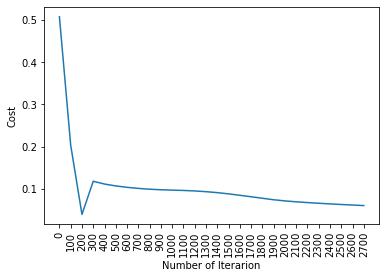

train accuracy: 92.63745704467354 %
test accuracy: 91.78694158075601 %


In [41]:
parameters, connection_amount=multi_layer_model([16,8],x_train,y_train,x_test,y_test,num_iter=2800,lr=0.3)

# the first array is where we desing our net for hidden layers with nodes.


## Persamaan
Salah satu algoritma yang sering digunakan dalam melakukan learning terhadap ANN adalah Backpropagation algorithm. Algoritma ini dikembangkan oleh Rumelhart dan McClelland (1986). Sebuah neural networks umumnya terdiri dari input, output dan hidden layer. Single layer ANN merupakan bentuk yang paling populer, tetapi seperti gambar di bawah, sebuah ANN juga bisa mempunyai lebih dari single hidden layer.
Dalam algoritma Backpropagation, proses learning dilaksanakan dengan, pertama, melakukan proses feed forward dengan mengirimkan signal ‘forward’. Adapun proses yang dilakukan dalam proses feed forward ini untuk sebuah neuron digambarkan dalam gambar berikut ini.
Seperti yang digambarkan, kegiatan yang dilakukan dalam proses feed forward adalah menghitung Weighted Sum dan mengirimkan jumlah tersebut ke suatu Activation Function sehingga menghasilkan Output. Adapun rumus yang digunakan untuk menghitung weighted sum adalah:

A_j(X,W) = SUM(i=1 to n) x_i * w_ji

dimana:
j : indeks dari output
i : indeks dari input
x_i : input ke i
w_ji : weight dari input ke i ke output ke j

Untuk Activation Function, ada banyak yang bisa digunakan, tetapi yang paling banyak digunakan adalah Fungsi Sigmoid yang dirumuskan sebagai berikut:

O_j(X,W) = 1 / (1 + exp(A_j(X,W)))

dimana:
O_j(X,W) : output ke j
Dengan sifat dari fungsi sigmoid ini, output dari neuron dapat dilakukan dengan lebih smooth. Selanjutnya apabila semua output sudah didapatkan, yang perlu dilakukan adalah membandingkan antara output yang dikeluarkan dari perhitungan dengan output riilnya (perlu diingat bahwa ANN merupakan salah satu metode supervised classification, dimana output riil akan menjadi bagian dalam proses pemodelan. Dalam hal ini, output yang dihasilkan dari perhitungan akan dicocokan dalam proses learning dengan output riilnya). Adapun rumus yang digunakan untuk menghitung perbedaan tersebut adalah sebagai berikut:

E_j(X,W,d) = (O_j(X,W) – d_j)^2

dimana:
E_j(X,W,d) : error/perbedaan antara hasil output perhitungan dengan output riil
d_j : output riil ke j

Secara umum, perbedaan output perhitungan dan output riil dihitung dengan rumus:

E(X,W,d) = SUM(j=1 to m) (O_j(X,W) – d_j)^2
Setelah mendapatkan perbedaan output tersebut, apabila perbedaan yang ada masih di atas threshold, maka error yang ada di-‘propagate’ backward dengan melakukan adjustment terhadap weight yang ada pada networks. Adapun metode yang bisa digunakan adalah metode gradient descendent dengan rumus berikut ini:

Diff w_ji = – eta dE/dw_ji

dimana:
eta : a constant
dE/dw_ji : the derivative of error E with respect to the weight w_ji

Di sini goal yang ingin dituju, bagaimana caranya agar weight yang didapatkan dapat meminimalisasikan error yang muncul. Untuk keperluan tersebut, sebelum menghitung langsung pengaruh weight terhadap error, kita perlu menghitung pengaruh output penghitungan terhadap error dengan rumus sebagai berikut, yang merupakan penurunan dari derivative dari error terhadap output perhitungan:

dE/dO_j = 2 * (O_j – d_j)

Selanjutnya adalah melihat pengaruh weight terhadap output perhitungan yang dihitung dengan nilai derivative dari output perhitungan terhadap weight sebagai berikut:

dO_j/dw_ji = dO_j/DA_j * dA_j/dw_ji = O_j*(1-O_j)*x_i

Sehingga,

dE/dw_ji = dE/dO_j * dO_j/dw_ji = 2 * (O_j – d_j) * O_j * (1 – O_j) * x_i

Dan akhirnya,

Diff w_ji = – 2 * eta * (O_j – d_j) * O_j * (1 – O_j) * x_i

Apabila di depan layer yang bersangkutan masih terdapat layer yang ingin dihitung atau di-adjust weightnya, maka proses di atas perlu diulang dengan menganggap bahwa input pada layer yang telah diadjust weightnya sebagai output dari layer yang sedang dihitung dengan rumus:

Diff v_ik = – eta * dE/dv_ik = – eta * dE/dx_i * dx_i/dv_ik

Seperti yang dijelaskan di atas rumus ini sebenarnya sama dengan dengan rumus sebelumnya, tetapi di sini weightnya disimbolkan dengan v_ik dan outputnya disimbolkan dengan x_i.